# 泰坦尼克号数据集调查

## 1 查看数据集结构

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file_path = './titanic-data.csv'
original_df = pd.read_csv(file_path)
original_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### [Kaggle网站](https://www.kaggle.com/c/titanic/data)上的数据集结构说明：

**Data Dictionary**

|Variable|Definition|Key|
|:-|:-|:-|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||	
|Age|Age in years||	
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||	
|fare|Passenger fare||	
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|


**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
<br>1st = Upper
<br>2nd = Middle
<br>3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
<br>Sibling = brother, sister, stepbrother, stepsister
<br>Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
<br>Parent = mother, father
<br>Child = daughter, son, stepdaughter, stepson
<br>Some children travelled only with a nanny, therefore parch=0 for them.


In [3]:
# 数据行数
print len(original_df)

891


## 2 定义调查问题 
### 2.1 有哪些因素会让船上的人生还率更高？
* 舱位等级（Pclass）
* 年龄
* 性别
* 有亲属同船的
* 登船港口


## 3 数据加工（缺失数据处理）
### 3.1 查看各列缺失值数量

In [4]:
print '%16s    %s' % ('列名', '缺失值数量')
print '='*30
for col in original_df:
    print '%16s    %d' % (col,sum(original_df[col].isna()))


          列名    缺失值数量
     PassengerId    0
        Survived    0
          Pclass    0
            Name    0
             Sex    0
             Age    177
           SibSp    0
           Parch    0
          Ticket    0
            Fare    0
           Cabin    687
        Embarked    2


从初步调查看：
- 缺失值最多的是舱号（Cabin），由于调查问题中不涉及该列, 可不做处理
- 年龄（Age）缺失值较多, 而港口（Embarked）缺失值较少，可以查看缺港口的是否同时缺年龄

In [5]:
# 查看港口和年龄同时缺失的记录数
print sum(original_df['Embarked'].isna() & original_df['Age'].isna())

0


### 3.2 处理缺失数据

In [6]:
valid_age_df = original_df.loc[original_df['Age'].notna()]
valid_harbour_df = original_df.loc[original_df['Embarked'].notna()]
# 验证记录数
print len(valid_age_df)
print len(valid_harbour_df)

714
889


## 4 调查数据
### 4.1 描述数据

In [7]:
if True:
    print original_df['Survived'].describe(),'\n'

if True:
    print original_df['Pclass'].describe(),'\n'

if True:
    print valid_age_df['Age'].describe(),'\n'
    
if True:
    print original_df['Sex'].describe(),'\n'
    
if True:
    print original_df['SibSp'].describe(),'\n'
    
if True:
    print original_df['Parch'].describe(),'\n'
    
if True:
    print original_df['Fare'].describe(),'\n'
    
if True:
    print valid_harbour_df['Embarked'].describe(),'\n'

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64 

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64 

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object 

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64 

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        

### 4.2 调查问题1：有哪些因素会让船上的人生还率更高？
#### 4.2.1 舱位等级（Pclass）

In [8]:
# 总体生存率情况
original_df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [9]:
# 不同舱位等级乘员的生存率情况
original_df.groupby('Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


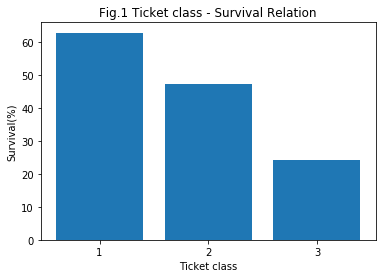

In [10]:
# 不同舱位等级生存率比较
survived_group = original_df.groupby('Pclass')['Survived']
pclass_mean = survived_group.mean()
plt.bar(pclass_mean.index, pclass_mean.values*100, tick_label=pclass_mean.index)
plt.xlabel('Ticket class')
plt.ylabel('Survival(%)')
plt.title('Fig.1 Ticket class - Survival Relation')
plt.show()

In [11]:
# Pclass为离散变量，用卡方检验，取α=0.05
from scipy.stats import chisquare

print '观察生存人数与预期生存人数比较' 
print 'H0: 观察生存人数与预期生存人数不相符'
print 'H1: 观察生存人数与预期生存人数相符'
print 'α=0.05，卡方检验'
print '='*30
pclass_sum = survived_group.sum()
pclass_count = survived_group.count()
f_obs = pclass_sum.values
f_exp = (pclass_count * original_df['Survived'].mean()).values
print '实际生存人数：', f_obs
print '预期生存人数：', f_exp
print '卡方检验：', chisquare(f_obs, f_exp)    

观察生存人数与预期生存人数比较
H0: 观察生存人数与预期生存人数不相符
H1: 观察生存人数与预期生存人数相符
α=0.05，卡方检验
实际生存人数： [136  87 119]
预期生存人数： [  82.90909091   70.62626263  188.46464646]
卡方检验： Power_divergenceResult(statistic=63.396245597723173, pvalue=1.7126955990497913e-14)


**结论4.2.1**
- 根据图1所示，舱位等级越高的乘员生存率越高。
- 因为$ P = 1.713*10^{-14} $，故按 $α=0.05$ 水平，拒绝 $ H_1 $，接受 $ H_0 $，即不同舱位等级乘员的生存人数与预期（按总体生存率计算）生存人数不相符，也就是舱位等级与乘员的生存率有关。

#### 4.2.2 年龄（Age）

In [12]:
# 查看年龄分布情况
valid_age_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

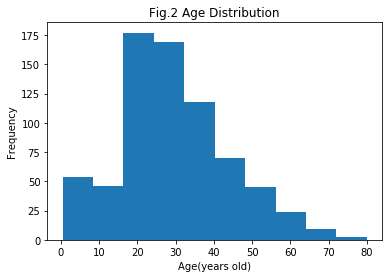

In [13]:
# 乘员年龄分布
plt.hist(valid_age_df['Age'])
plt.xlabel('Age(years old)')
plt.ylabel('Frequency')
plt.title('Fig.2 Age Distribution')
plt.show()

In [14]:
# 按年龄每10岁为一组，分为 8 组：
valid_age_df['Agegroup'] = valid_age_df['Age'].apply(lambda x: int((x - 0.001)//10))

c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
valid_age_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [16]:
valid_age_df.groupby('Agegroup')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Agegroup,,,,,,,,
0,64.0,0.593750,0.495015,0.0,0.0,1.0,1.0,1.0
1,115.0,0.382609,0.488151,0.0,0.0,0.0,1.0,1.0
2,230.0,0.365217,0.482541,0.0,0.0,0.0,1.0,1.0
3,155.0,0.445161,0.498595,0.0,0.0,0.0,1.0,1.0
4,86.0,0.383721,0.489143,0.0,0.0,0.0,1.0,1.0
5,42.0,0.404762,0.496796,0.0,0.0,0.0,1.0,1.0
6,17.0,0.235294,0.437237,0.0,0.0,0.0,0.0,1.0
7,5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0


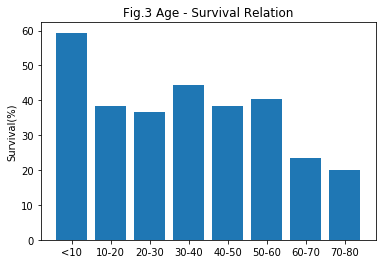

In [17]:
survived_group = valid_age_df.groupby('Agegroup')['Survived']
age_mean = survived_group.mean()
plt.bar(age_mean.index,age_mean.values*100, tick_label=['<10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])
plt.xlabel('Age(years old)')
plt.ylabel('Survival(%)')
plt.title('Fig.3 Age - Survival Relation')
plt.show()

In [20]:
# 验证10岁以下和60岁以上乘员的生存率与总体生存率是否相同
# 年龄是连续变量，应用t检验
from scipy.stats import ttest_1samp

print '各样本与总体均数比较' 
print 'H0: 样本n的生存率与总体生存率相同'
print 'H1: 样本n的生存率与总体生存率不同'
print 'α=0.05，单尾t检验'
print '='*30

age_mean = valid_age_df['Survived'].mean()

for i in sorted(valid_age_df['Agegroup'].unique()):
    group_data = valid_age_df[valid_age_df['Agegroup']==i]['Survived'] 
    print '%d ~ %d岁：' % (i*10, (i+1)*10), ttest_1samp(group_data, age_mean)



 各样本与总体均数比较
H0: 样本n的生存率与总体生存率相同
H1: 样本n的生存率与总体生存率不同
α=0.05，单尾t检验
0 ~ 10岁： Ttest_1sampResult(statistic=3.0316269074489375, pvalue=0.0035278697359956961)
10 ~ 20岁： Ttest_1sampResult(statistic=-0.51743424867834753, pvalue=0.60585563429174139)
20 ~ 30岁： Ttest_1sampResult(statistic=-1.2868595896229751, pvalue=0.19944252093645054)
30 ~ 40岁： Ttest_1sampResult(statistic=0.97380009743201446, pvalue=0.33168291549268702)
40 ~ 50岁： Ttest_1sampResult(statistic=-0.42546668930831599, pvalue=0.67157178922433469)
50 ~ 60岁： Ttest_1sampResult(statistic=-0.018270420460130162, pvalue=0.98551174843507838)
60 ~ 70岁： Ttest_1sampResult(statistic=-1.6112719985589989, pvalue=0.12666898151774331)
70 ~ 80岁： Ttest_1sampResult(statistic=-1.0308123249299719, pvalue=0.36087539994202772)


**结论4.2.2**
- 从图3大致推测10岁以下、60~70岁和70~80岁3个年龄段生存率与其他年龄段生存率差异较明显。10岁以下儿童的生存率较高。
- 从t检验结果可得出结论：10岁以下乘员的生存率高于总体生存率，其他年龄段生存率与总体生存率相同

#### 4.2.3 性别（Sex）

In [46]:
# 不同性别乘员的生存率情况
original_df.groupby('Sex')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


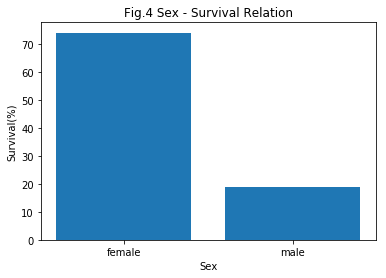

In [47]:
# 不同性别生存率比较
survived_group = original_df.groupby('Sex')['Survived']
sex_mean = survived_group.mean()
plt.bar(sex_mean.index, sex_mean.values*100, tick_label=sex_mean.index)
plt.xlabel('Sex')
plt.ylabel('Survival(%)')
plt.title('Fig.4 Sex - Survival Relation')
plt.show()

In [48]:
# Sex为离散变量，用卡方检验，取α=0.05
from scipy.stats import chisquare

print '观察生存人数与预期生存人数比较' 
print 'H0: 观察生存人数与预期生存人数不相符'
print 'H1: 观察生存人数与预期生存人数相符'
print 'α=0.05，卡方检验'
print '='*30
sex_sum = survived_group.sum()
sex_count = survived_group.count()
f_obs = sex_sum.values
f_exp = (sex_count * original_df['Survived'].mean()).values
print '实际生存人数：', f_obs
print '预期生存人数：', f_exp
print '卡方检验：', chisquare(f_obs, f_exp)    

观察生存人数与预期生存人数比较
H0: 观察生存人数与预期生存人数不相符
H1: 观察生存人数与预期生存人数相符
α=0.05，卡方检验
实际生存人数： [233 109]
预期生存人数： [ 120.52525253  221.47474747]
卡方检验： Power_divergenceResult(statistic=162.08166685161615, pvalue=3.970516389658672e-37)


**结论4.2.3**
- 因为$ P = 3.971*10^{-37} $，故按 $α=0.05$ 水平，拒绝 $ H_1 $，接受 $ H_0 $，即不同性别乘员的生存人数与预期（按总体生存率计算）生存人数不相符，也就是性别与乘员的生存率有关。
- 女性生存率较男性高。

#### 4.2.4 有亲属同船的（SibSp, Parch）

In [49]:
# 合并同船亲属：
original_df['Relatives'] = original_df['SibSp'] + original_df['Parch']
# original_df[original_df['Relatives']>5]
original_df.groupby('Relatives')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Relatives,,,,,,,,
0,537.0,0.303538,0.460214,0.0,0.0,0.0,1.0,1.0
1,161.0,0.552795,0.498756,0.0,0.0,1.0,1.0,1.0
2,102.0,0.578431,0.496249,0.0,0.0,1.0,1.0,1.0
3,29.0,0.724138,0.454859,0.0,0.0,1.0,1.0,1.0
4,15.0,0.200000,0.414039,0.0,0.0,0.0,0.0,1.0
5,22.0,0.136364,0.351250,0.0,0.0,0.0,0.0,1.0
6,12.0,0.333333,0.492366,0.0,0.0,0.0,1.0,1.0
7,6.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
10,7.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


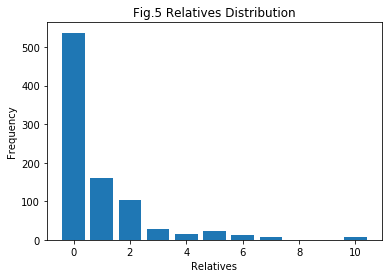

In [50]:
# 亲属数量分布
survived_group = original_df.groupby('Relatives')['Survived']
relatives_count = survived_group.count()
plt.bar(relatives_count.index, relatives_count.values)
plt.xlabel('Relatives')
plt.ylabel('Frequency')
plt.title('Fig.5 Relatives Distribution')
plt.show()

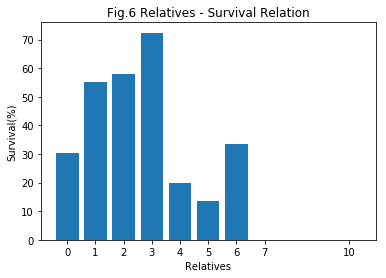

In [51]:
# 亲属同船生存率比较
survived_group = original_df.groupby('Relatives')['Survived']
relatives_mean = survived_group.mean()
plt.bar(relatives_mean.index, relatives_mean.values*100, tick_label=relatives_mean.index)
plt.xlabel('Relatives')
plt.ylabel('Survival(%)')
plt.title('Fig.6 Relatives - Survival Relation')
plt.show()

In [52]:
print '观察生存人数与预期生存人数比较' 
print 'H0: 观察生存人数与预期生存人数不相符'
print 'H1: 观察生存人数与预期生存人数相符'
print 'α=0.05，卡方检验'
print '='*30
relatives_sum = survived_group.sum()
relatives_count = survived_group.count()
f_obs = relatives_sum.values
f_exp = (relatives_count * original_df['Survived'].mean()).values
print '实际生存人数：', f_obs
print '预期生存人数：', f_exp
print '卡方检验：', chisquare(f_obs, f_exp)    

观察生存人数与预期生存人数比较
H0: 观察生存人数与预期生存人数不相符
H1: 观察生存人数与预期生存人数相符
α=0.05，卡方检验
实际生存人数： [163  89  59  21   3   3   4   0   0]
预期生存人数： [ 206.12121212   61.7979798    39.15151515   11.13131313    5.75757576
    8.44444444    4.60606061    2.3030303     2.68686869]
卡方检验： Power_divergenceResult(statistic=49.707183027350283, pvalue=4.6518816331336911e-08)


**结论4.2.4**
- 从图6看，有1-3名亲属同船者生存率较高。
- 因为$ P = 4.652*10^{-8} $，故按 $α=0.05$ 水平，拒绝 $ H_1 $，接受 $ H_0 $，即有不同数量亲属同船的乘员的生存人数与预期（按总体生存率计算）生存人数不相符，也就是同船亲属数量与乘员的生存率有关。

#### 4.2.5 登船港口（Embarked）

In [53]:
# 不同港口登船乘员的生存率情况
valid_harbour_df.groupby('Embarked')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,0.553571,0.498608,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,644.0,0.336957,0.473037,0.0,0.0,0.0,1.0,1.0


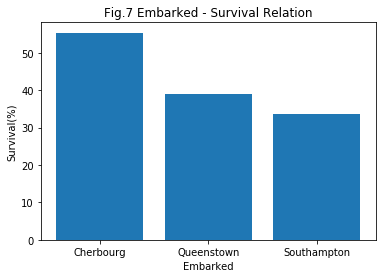

In [54]:
# 不同港口登船者生存率比较
survived_group = valid_harbour_df.groupby('Embarked')['Survived']
harbour_mean = survived_group.mean()
plt.bar(harbour_mean.index, harbour_mean.values*100, tick_label=['Cherbourg', 'Queenstown', 'Southampton'])
plt.xlabel('Embarked')
plt.ylabel('Survival(%)')
plt.title('Fig.7 Embarked - Survival Relation')
plt.show()

In [56]:
# Sex为离散变量，用卡方检验，取α=0.05
from scipy.stats import chisquare

print '观察生存人数与预期生存人数比较' 
print 'H0: 观察生存人数与预期生存人数不相符'
print 'H1: 观察生存人数与预期生存人数相符'
print 'α=0.05，卡方检验'
print '='*30
harbour_sum = survived_group.sum()
harbour_count = survived_group.count()
f_obs = harbour_sum.values
f_exp = (harbour_count * valid_harbour_df['Survived'].mean()).values
print '实际生存人数：', f_obs
print '预期生存人数：', f_exp
print '卡方检验：', chisquare(f_obs, f_exp)    

观察生存人数与预期生存人数比较
H0: 观察生存人数与预期生存人数不相符
H1: 观察生存人数与预期生存人数相符
α=0.05，卡方检验
实际生存人数： [ 93  30 217]
预期生存人数： [  64.2519685   29.4488189  246.2992126]
卡方检验： Power_divergenceResult(statistic=16.358316379911653, pvalue=0.00028043791624590681)


**结论4.2.5**
- 图7显示从Cherbourg登船的人生存率较高。
- 因为$ P = 2.804*10^{-4} $，故按 $α=0.05$ 水平，拒绝 $ H_1 $，接受 $ H_0 $，即不同港口登船的生存人数与预期（按总体生存率计算）生存人数不相符，也就是登船港口与乘员的生存率有关。